In [1]:
import pandas as pd

C:\Users\vaibh\AppData\Local\Temp/ipykernel_26152/4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# reading the data frame
df = pd.read_csv('Spotify_data.csv')

In [3]:
# making a copy of original data frame
df_copy = df

In [4]:
df_copy.head()

,Unnamed: 0,Track Name,Artists,Album Name,Album ID,Track ID,Popularity,Release Date,Duration (ms),Explicit,...,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,0,Not Like Us,Kendrick Lamar,Not Like Us,5JjnoGJyOxfSZUZtk2rRwZ,6AI3ezQ4o3HUoP6Dhudph3,96,2024-05-04,274192,True,...,0.472,1,-7.001,1,0.0776,0.0107,0.000000,0.1410,0.214,101.061
1,1,Houdini,Eminem,Houdini,6Xuu2z00jxRPZei4IJ9neK,2HYFX63wP3otVIvopRS99Z,94,2024-05-31,227239,True,...,0.887,9,-2.760,0,0.0683,0.0292,0.000002,0.0582,0.889,127.003
2,2,BAND4BAND (feat. Lil Baby),"Central Cee, Lil Baby",BAND4BAND (feat. Lil Baby),4AzPr5SUpNF553eC1d3aRy,7iabz12vAuVQYyekFIWJxD,91,2024-05-23,140733,True,...,0.764,11,-5.241,1,0.2040,0.3590,0.000000,0.1190,0.886,140.113
3,3,I Don't Wanna Wait,"David Guetta, OneRepublic",I Don't Wanna Wait,0wCLHkBRKcndhMQQpeo8Ji,331l3xABO0HMr1Kkyh2LZq,90,2024-04-05,149668,False,...,0.714,1,-4.617,0,0.0309,0.0375,0.000000,0.2320,0.554,129.976
4,4,Pedro,"Jaxomy, Agatino Romero, Raffaella Carrà",Pedro,5y6RXjI5VPR0RyInghTbf1,48lxT5qJF0yYyf2z4wB4xW,89,2024-03-29,144846,False,...,0.936,9,-6.294,1,0.3010,0.0229,0.000001,0.3110,0.844,151.019


In [5]:
# The dataset has an unnamed column, I’ll drop it and move forward:
df_copy.drop(columns=['Unnamed: 0'], inplace=True)

In [6]:
# checking for duplicates
df_copy.duplicated().sum()

15

In [7]:
# dropping duplicates
df_copy.drop_duplicates(inplace=True)

In [8]:
# verifying duplicates are actually dropped
df_copy.duplicated().sum()

0

In [9]:
# looking at data before moving fordward
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 212 entries, 0 to 226
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Track Name        212 non-null    object 
 1   Artists           212 non-null    object 
 2   Album Name        212 non-null    object 
 3   Album ID          212 non-null    object 
 4   Track ID          212 non-null    object 
 5   Popularity        212 non-null    int64  
 6   Release Date      212 non-null    object 
 7   Duration (ms)     212 non-null    int64  
 8   Explicit          212 non-null    bool   
 9   External URLs     212 non-null    object 
 10  Danceability      212 non-null    float64
 11  Energy            212 non-null    float64
 12  Key               212 non-null    int64  
 13  Loudness          212 non-null    float64
 14  Mode              212 non-null    int64  
 15  Speechiness       212 non-null    float64
 16  Acousticness      212 non-null    float64
 17  In

In [10]:
# Now, let’s get started with EDA.
#  As popularity is the target variable, I’ll have a look at the relationship between all the music features with popularity:

In [11]:
# importing recquired libraries
import matplotlib.pyplot as plt
import seaborn as sns

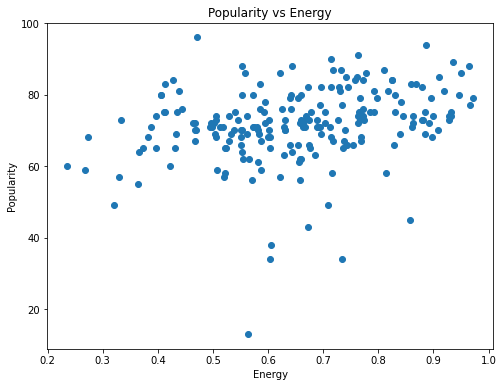

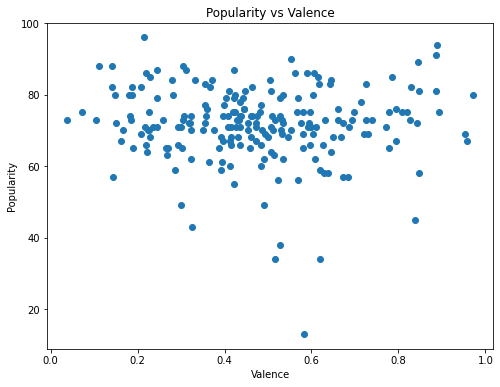

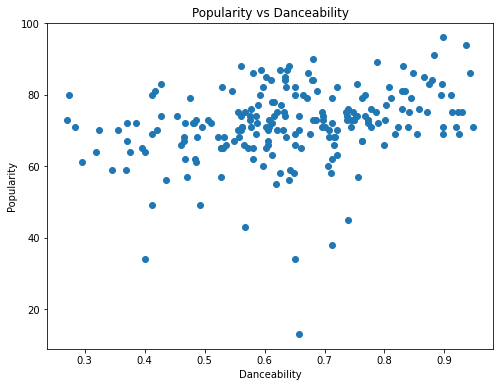

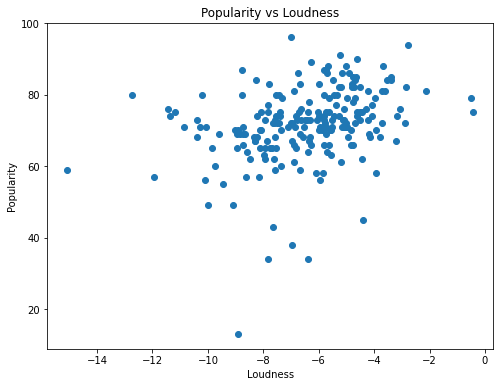

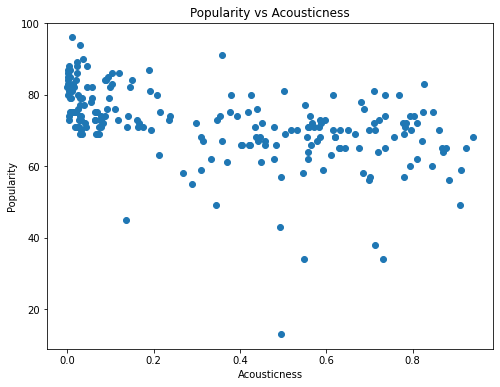

In [12]:
# list of desired features
features = ['Energy', 'Valence', 'Danceability', 'Loudness', 'Acousticness']
# now creating scatter plot for each feature to know about relationship of each feature with popularity
for feature in features:
  plt.figure(figsize=(8,6))
  plt.scatter(data=df_copy, x=feature,y='Popularity')
  plt.title(f'Popularity vs {feature}')
  plt.xlabel(feature)
  plt.ylabel('Popularity')
  plt.show()

In [13]:
                                     #### summary that we get from these scatter plot ####
"""
"From these visualizations, we can observe that higher energy levels and danceability tend to correlate positively with higher popularity scores. 
Conversely, increased acousticness and lower loudness levels generally correspond with lower popularity, 
suggesting that more energetic and less acoustic tracks are favoured. 
Valence shows a weaker, less clear relationship with popularity, 
indicating that the emotional positivity of a track alone doesn’t strongly predict its popularity."
"""

'\n"From these visualizations, we can observe that higher energy levels and danceability tend to correlate positively with higher popularity scores. \nConversely, increased acousticness and lower loudness levels generally correspond with lower popularity, \nsuggesting that more energetic and less acoustic tracks are favoured. \nValence shows a weaker, less clear relationship with popularity, \nindicating that the emotional positivity of a track alone doesn’t strongly predict its popularity."\n'

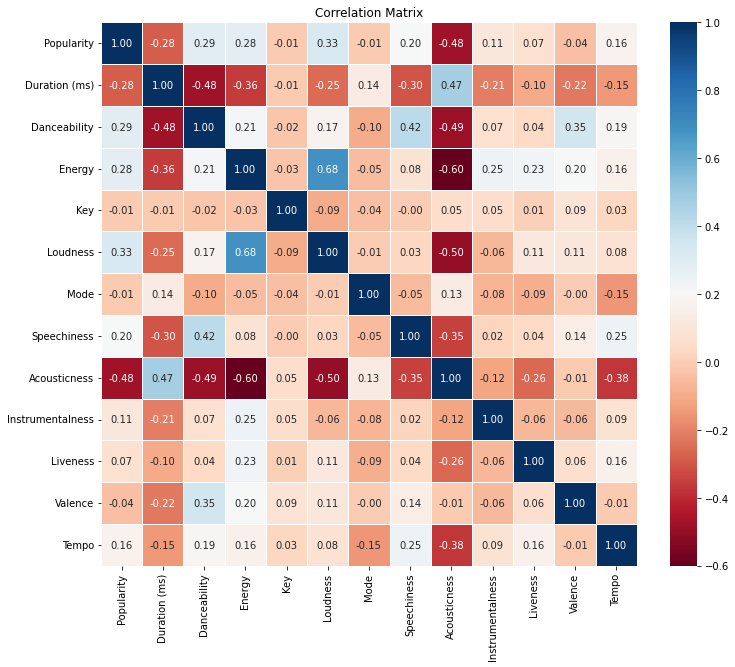

In [14]:
# lets have a look at correlation between all the features
# getting all the numeric columns
numeric_columns = df_copy.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_columns.corr()
# visualizing it
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [15]:
                                       ####summary from the heatmap ####
"""
From the above correlation matrix, we can see that popularity has a moderate positive correlation with loudness (0.31) and danceability (0.25),
indicating that louder and more danceable tracks tend to be more popular. 
There is a moderate negative correlation between popularity and acousticness (-0.43), 
suggesting that tracks with higher acousticness are generally less popular. 
Energy also has a positive correlation with popularity (0.25).
"""

'\nFrom the above correlation matrix, we can see that popularity has a moderate positive correlation with loudness (0.31) and danceability (0.25),\nindicating that louder and more danceable tracks tend to be more popular. \nThere is a moderate negative correlation between popularity and acousticness (-0.43), \nsuggesting that tracks with higher acousticness are generally less popular. \nEnergy also has a positive correlation with popularity (0.25).\n'

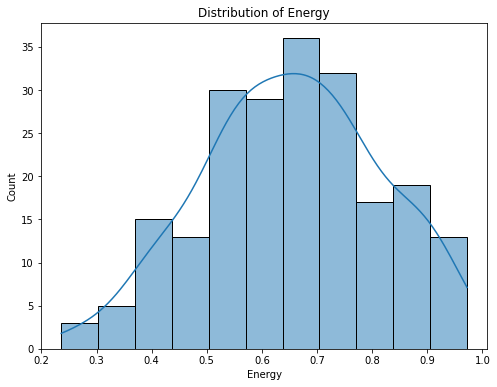

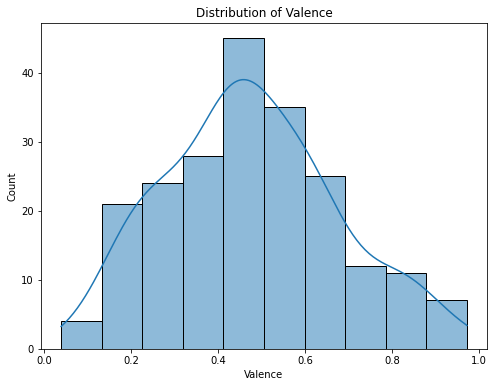

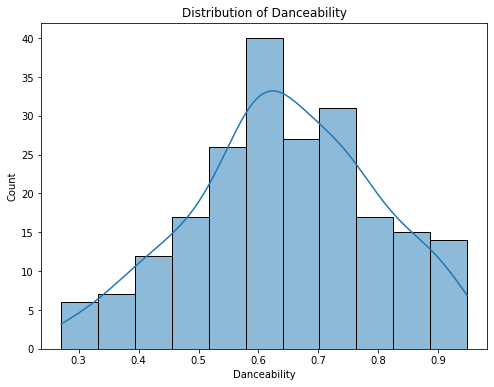

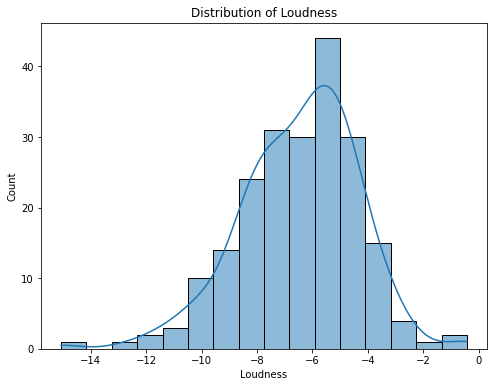

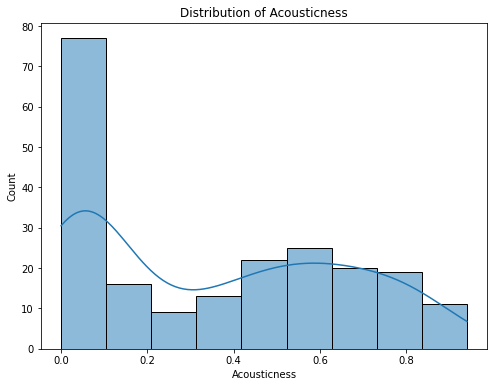

In [16]:
# now looking at distribution of all the music feature
for feature in features:
  plt.figure(figsize=(8,6))
  sns.histplot(df_copy[feature], kde=True)
  plt.title(f"Distribution of {feature}")
  plt.show()


In [17]:
                                              ####summary from the distribution plot of features####
"""
The distribution of energy is roughly bell-shaped, which indicates a balanced range of energy levels in the tracks. 
Valence and danceability also follow a similar distribution, with most tracks having mid-range values, 
which suggests an even mix of emotionally positive and danceable tracks. 
Loudness has a near-normal distribution centred around -6 dB, which reflects typical volume levels in the dataset. 
Acousticness, however, is skewed towards lower values, indicating that most tracks are not highly acoustic.
"""                                             

'\nThe distribution of energy is roughly bell-shaped, which indicates a balanced range of energy levels in the tracks. \nValence and danceability also follow a similar distribution, with most tracks having mid-range values, \nwhich suggests an even mix of emotionally positive and danceable tracks. \nLoudness has a near-normal distribution centred around -6 dB, which reflects typical volume levels in the dataset. \nAcousticness, however, is skewed towards lower values, indicating that most tracks are not highly acoustic.\n'